In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC # SVM
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.model_selection import GridSearchCV # for tunnig hyper parameter it will use all combination of given parameters
from sklearn.model_selection import RandomizedSearchCV # same for tunning hyper parameter but will use random combinations of parameters
from sklearn.metrics import confusion_matrix,recall_score,precision_recall_curve,auc,roc_curve,roc_auc_score,classification_report

%matplotlib inline

creditcard.csv



In [2]:
data = pd.read_csv("../input/creditcard.csv",header = 0)
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
## Pre-processing the data
## Normalizing the amount column

from sklearn.preprocessing import StandardScaler
data['normAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
data = data.drop(['Time','Amount'],axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [4]:
## Since the data is largely imbalanced we need to resample the data such that the proportion/ratio between fraudulent and normal transactions are relativeley similar.

x = data.loc[:, data.columns != 'Class']
y = data.loc[:, data.columns == 'Class']

In [5]:
#UNDERSAMPLING
# Number of fraudelent transaction in the existing data
numberOffraudulentTransaction = len(data[data.Class == 1])
fraudIndices = np.array(data[data.Class == 1].index)

# Picking the indices of the normal classes
normalIndices = data[data.Class == 0].index

# Out of the indices we picked, randomly select "x" number (number_records_fraud)
random_normal_indices = np.random.choice(normalIndices, numberOffraudulentTransaction, replace = False)
random_normal_indices = np.array(random_normal_indices)


In [6]:
#UNDERSAMPLING
# Appending the 2 indices
under_sample_indices = np.concatenate([fraudIndices,random_normal_indices])

# Under sample dataset
under_sample_data = data.iloc[under_sample_indices,:]

x_undersample = under_sample_data.loc[:, under_sample_data.columns != 'Class']
y_undersample = under_sample_data.loc[:, under_sample_data.columns == 'Class']

# Showing ratio
print("Percentage of normal transactions: ", len(under_sample_data[under_sample_data.Class == 0])/len(under_sample_data))
print("Percentage of fraud transactions: ", len(under_sample_data[under_sample_data.Class == 1])/len(under_sample_data))
print("Total number of transactions in resampled data: ", len(under_sample_data))

Percentage of normal transactions:  0.5
Percentage of fraud transactions:  0.5
Total number of transactions in resampled data:  984


In [7]:
#OVERSAMPLING
## Splitting the data into Training,Validation and Test Set##
## Test Set needs to be unused till the mere end##
X_train, X_test, Y_train, Y_test = train_test_split(data,y, test_size=0.25, random_state=42)
X_train, X_val, Y_train, Y_val = train_test_split(X_train,Y_train, test_size=0.25, random_state=42)
# #Figuring out the ratio of normal transction and fraudelent transaction from training data# #
normal_tdata = X_train[X_train["Class"]==0]
print("train data: length of normal data",len(normal_tdata))
fraud_tdata = X_train[X_train["Class"]==1]
print("train data: length of fraud data",len(fraud_tdata))
## dataset for validation set ##
normal_vdata = X_val[X_val["Class"]==0]
print("For Validation Set :length of normal data",len(normal_vdata))
fraud_vdata = X_val[X_val["Class"]==1]
print("For Validation Set :length of fraud data",len(fraud_vdata))

train data: length of normal data 159920
train data: length of fraud data 283
For Validation Set :length of normal data 53306
For Validation Set :length of fraud data 96


In [8]:
#SMOTE
#Since the data is highly imbalanced we use the sklearn package to balance out the data by introducing more fraudulent data ##
#basically oversampling of data 
sm = SMOTE(random_state=12, ratio = 'auto', k_neighbors=5)
#Possible ratios : minority, majority, not minority, all, auto
x_train_res, y_train_res = sm.fit_sample(X_train, Y_train.values.ravel())

In [9]:
a = x_train_res[:,28]
b= np.count_nonzero(a == 1)
c= np.count_nonzero(a == 0)
print("length of oversampled data is ",len(x_train_res))
print("Number of normal transcation in oversampled data",b)
print("No.of fraud transcation",c)
print("Proportion of Normal data in oversampled data is ",c/len(x_train_res))
print("Proportion of fraud data in oversampled data is ",b/len(x_train_res))

length of oversampled data is  319840
Number of normal transcation in oversampled data 159920
No.of fraud transcation 159920
Proportion of Normal data in oversampled data is  0.5
Proportion of fraud data in oversampled data is  0.5


In [10]:
print ("UNDERSAMPLING")
df = under_sample_data
#train, validate, test = np.split(df.sample(frac=1), [int(.5*len(df)), int(.75*len(df))])
x, x_test, y, y_test = train_test_split(x_undersample,y_undersample,test_size=0.25,train_size=0.75)
x_train, x_cv, y_train, y_cv = train_test_split(x,y,test_size = 0.33,train_size =0.66)

scaler = StandardScaler()

x_train = scaler.fit_transform (x_train)
x_cv = scaler.fit_transform (x_cv)
x_test = scaler.fit_transform (x_test)

# cross-validate needs to be here (after the splitting for proper X-V)

UNDERSAMPLING
0.930894308943
[[125   0]
 [ 17 104]]
             precision    recall  f1-score   support

          0       0.88      1.00      0.94       125
          1       1.00      0.86      0.92       121

avg / total       0.94      0.93      0.93       246

LOGICREGRESS
0.930894308943
SVM


RANDOMFOREST
[[124   1]
 [ 19 102]]
0.910714285714
DECISIONTREE
[[120   5]
 [ 15 106]]
0.913793103448
NEURALNETWORK
[[125   0]
 [ 18 103]]
0.919642857143
OVERSAMPLING


1.0


[[71089     0]
 [    0   113]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     71089
          1       1.00      1.00      1.00       113

avg / total       1.00      1.00      1.00     71202



LOGICREGRESS2
1.0
SVM


RANDOMFOREST
[[71089     0]
 [    0   113]]
1.0


DECISIONTREE
[[71089     0]
 [    0   113]]
1.0


NEURALNETWORK


[[71089     0]
 [    0   113]]
1.0


'The main parameters to adjust when using these methods is n_estimators and max_features. \nThe larger n_estimators the better, but also the longer it  will take to compute. \nmax_feat is the size of the random subsets of features to consider when splitting a node. \nlower = greater the reduction of variance, but also the greater the increase in bias. \nEmpirical good default values are max_features=n_features for regression problems, \nand max_features=sqrt(n_features) for classification tasks (where n_features is the number of features \nin the data). Good results are often achieved when setting max_depth=None in combination with min_samples_split=1 \n(i.e., when fully developing the trees). The best parameter values should always be cross-validated. \nIn addition, note that in random forests, bootstrap samples are used by default (bootstrap=True) \nwhile the default strategy for extra-trees is to use the whole dataset (bootstrap=False). When using \nbootstrap sampling the generaliza

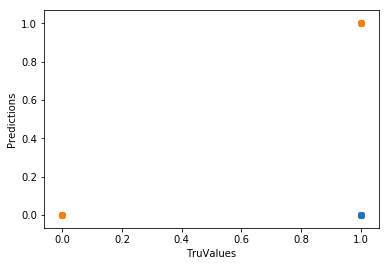

In [11]:
#UNDERSAMPLING
# My logic is regressing, guys!
logi = LogisticRegression(class_weight='balanced')
mdl = logi.fit(x_train, y_train.values.ravel())
predictions = logi.predict(x_test)
print(accuracy_score(y_test, predictions))
print (confusion_matrix(y_test, predictions))
print (classification_report(y_test, predictions))
plt.scatter(y_test, predictions)
print("LOGICREGRESS")
plt.xlabel("TruValues")
plt.ylabel("Predictions")
print (mdl.score(x_test, y_test))


# I will not put the receiver operating characteristic, no sir!

# Support vector machine, boss!

svc = SVC(C=1, kernel='linear')
svc2 = SVC(C=1, kernel='polynomial')
svc3 = SVC(C=1, kernel='rbf')
svc4 = SVC(C=1, kernel='sigmoid')
print("SVM")

# Random Forest stories, mate!

classif = RandomForestClassifier(n_estimators=100, n_jobs=2, min_samples_split=2, random_state=0)
#estimator = nb of free in forest, nbjobs = parallel calcul using cpu
#scores = cross_val_score(clf, X, y)
#scores.mean()    
classif.fit(x_train, y_train.values.ravel())
y_pred_test_rf = classif.predict(x_test)
print("RANDOMFOREST")
print(confusion_matrix(y_test, y_pred_test_rf))
print(f1_score(y_test, y_pred_test_rf))


# Decision Tree, baby!
classif2 = DecisionTreeClassifier(max_depth=None, min_samples_split=2,random_state=0)
classif2.fit(x_train, y_train.values.ravel())
y_pred_test_clf2 = classif2.predict(x_test)
#scores = cross_val_score(clf, x_train, y_train)
#scores.mean()
print("DECISIONTREE")
print(confusion_matrix(y_test, y_pred_test_clf2))
print(f1_score(y_test, y_pred_test_clf2))

# Neural network, captain!
lr = LogisticRegression(C = 1, penalty = 'l1')
lr.fit(x_train, y_train.values.ravel())
y_pred_test_nn = lr.predict(x_test)
print("NEURALNETWORK")
print(confusion_matrix(y_test, y_pred_test_nn))
print(f1_score(y_test, y_pred_test_nn))

# Extra Trees 4 social good, peepz!
classif3 = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
#scores = cross_val_score(clf, X, y)
#scores.mean() > 0.999


print ("OVERSAMPLING")

logi = LogisticRegression(class_weight='balanced')
mdl = logi.fit(X_train, Y_train.values.ravel())
predictions2 = logi.predict(X_test)
print(accuracy_score(Y_test, predictions2))
print (confusion_matrix(Y_test, predictions2))
print (classification_report(Y_test, predictions2))
plt.scatter(Y_test, predictions2)
print("LOGICREGRESS2")
plt.xlabel("TruValues")
plt.ylabel("Predictions")
print (mdl.score(X_test, Y_test))

svc = SVC(C=1, kernel='linear')
svc2 = SVC(C=1, kernel='polynomial')
svc3 = SVC(C=1, kernel='rbf')
svc4 = SVC(C=1, kernel='sigmoid')
print("SVM")

# Random Forest stories, mate!

classif = RandomForestClassifier(n_estimators=100, n_jobs=2, min_samples_split=2, random_state=0)
#estimator = nb of free in forest, nbjobs = parallel calcul using cpu
#scores = cross_val_score(clf, X, y)
#scores.mean()    
classif.fit(X_train, Y_train.values.ravel())
Y_pred_test_rf = classif.predict(X_test)
print("RANDOMFOREST")
print(confusion_matrix(Y_test, Y_pred_test_rf))
print(f1_score(Y_test, Y_pred_test_rf))


# Decision Tree, baby!
classif2 = DecisionTreeClassifier(max_depth=None, min_samples_split=2,random_state=0)
classif2.fit(X_train, Y_train.values.ravel())
Y_pred_test_clf2 = classif2.predict(X_test)
#scores = cross_val_score(clf, x_train, y_train)
#scores.mean()
print("DECISIONTREE")
print(confusion_matrix(Y_test, Y_pred_test_clf2))
print(f1_score(Y_test, Y_pred_test_clf2))

# Neural network, captain!
lr = LogisticRegression(C = 1, penalty = 'l1')
lr.fit(X_train, Y_train.values.ravel())
Y_pred_test_nn = lr.predict(X_test)
print("NEURALNETWORK")
print(confusion_matrix(Y_test, Y_pred_test_nn))
print(f1_score(Y_test, Y_pred_test_nn))

# Extra Trees 4 social good, peepz!
classif3 = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
#scores = cross_val_score(clf, X, y)
#scores.mean() > 0.999
'''The main parameters to adjust when using these methods is n_estimators and max_features. 
The larger n_estimators the better, but also the longer it  will take to compute. 
max_feat is the size of the random subsets of features to consider when splitting a node. 
lower = greater the reduction of variance, but also the greater the increase in bias. 
Empirical good default values are max_features=n_features for regression problems, 
and max_features=sqrt(n_features) for classification tasks (where n_features is the number of features 
in the data). Good results are often achieved when setting max_depth=None in combination with min_samples_split=1 
(i.e., when fully developing the trees). The best parameter values should always be cross-validated. 
In addition, note that in random forests, bootstrap samples are used by default (bootstrap=True) 
while the default strategy for extra-trees is to use the whole dataset (bootstrap=False). When using 
bootstrap sampling the generalization accuracy can be estimated on the left out or out-of-bag samples. 
This can be enabled by setting oob_score=True.'''


In [12]:
tn, fp, fn,tp = confusion_matrix(predictions,y_test).ravel() 
Sensitivity=tp/float((tp+fn))#Sensitivity 
print ("SENS",Sensitivity)

Specificity=tn/float((tn+fp))#Specificity 
print ("SPEC",Specificity)

Accuracy= accuracy_score(predictions,y_test, normalize=True, sample_weight=None)
print ("ACC",Accuracy)

tn, fp, fn,tp = confusion_matrix(predictions2,Y_test).ravel() 
Sensitivity=tp/float((tp+fn))#Sensitivity 
print ("SENS",Sensitivity)

Specificity=tn/float((tn+fp))#Specificity 
print ("SPEC",Specificity)

Accuracy= accuracy_score(predictions2,Y_test, normalize=True, sample_weight=None)
print ("ACC",Accuracy)

SENS 1.0
SPEC 0.880281690141
ACC 0.930894308943
SENS 1.0
SPEC 1.0
ACC 1.0
